In [ ]:
import numpy as np, matplotlib.pyplot as plt, plot, pickle
from utils import *
from config import *

with open('data.backup', 'rb') as f:
    data = pickle.load(f)

In [3]:
def getFromId(mapId, trajId):
    return next(filter(lambda e: e['mapId'] == mapId and e['trajId'] == trajId, data))
def idToColor(id):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    return colors[id % len(colors)]

Text(0.5, 1.0, 'Average duration for 10 scenarios in the same map (solid: Phi*, dashed: Theta*)')

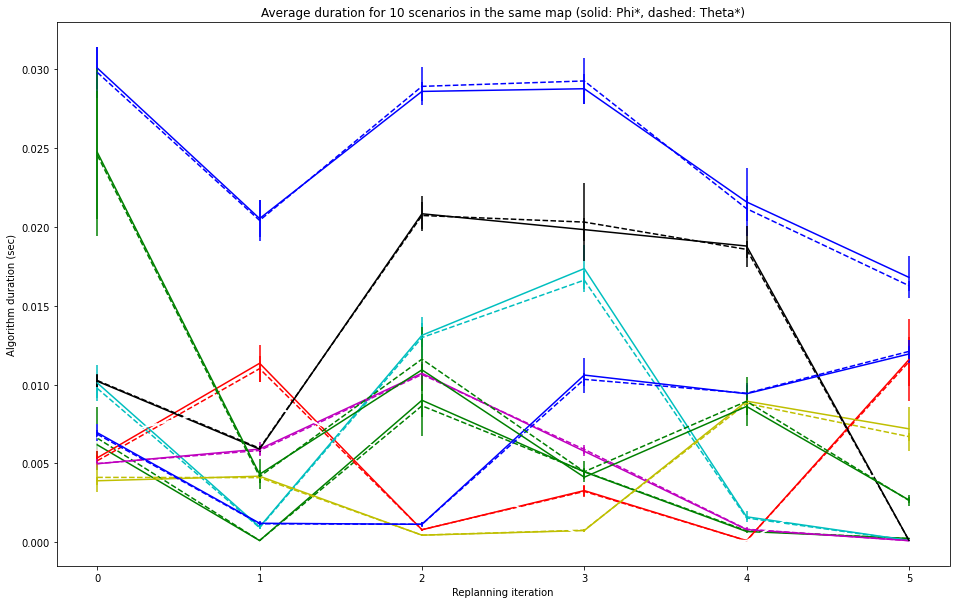

In [4]:
plt.figure(figsize=(16,10))
for i in range(10):
    sample = getFromId(1, i)
    plt.errorbar(range(BLOCKED_CELLS_LOOP+1), sample['durationsPhiMean'], yerr=sample['durationsPhiStd'], color=idToColor(i))
    plt.errorbar(range(BLOCKED_CELLS_LOOP+1), sample['durationsThetaMean'], yerr=sample['durationsThetaStd'], fmt='--', color=idToColor(i))
plt.xlabel('Replanning iteration')
plt.ylabel('Algorithm duration (sec)')
plt.title('Average duration for 10 scenarios in the same map (solid: Phi*, dashed: Theta*)')


In [172]:
def durationVSPlot(replanning=0):
    phiMean = []
    phiStd = []
    thetaMean = []
    thetaStd = []
    for sample in data:
        phiMean.append(sample['durationsPhiMean'][replanning])
        phiStd.append(sample['durationsPhiStd'][replanning])
        thetaMean.append(sample['durationsThetaMean'][replanning])
        thetaStd.append(sample['durationsThetaStd'][replanning])
    plt.errorbar(thetaMean, phiMean, xerr=thetaStd, yerr=phiStd, ecolor='m', elinewidth=1, errorevery=1, 
                 fmt='o', markersize=5, alpha=.8, label='Average duration')
    plt.plot([0,.1], [0,.1], color='r', alpha=.8, label='Ref identity line')
    plt.xlabel('Theta* duration')
    plt.ylabel('Phi* duration')
    plt.legend()
    plt.title('Phi*/Theta* duration for the planning {} (N={})'.format(replanning, len(phiMean)))

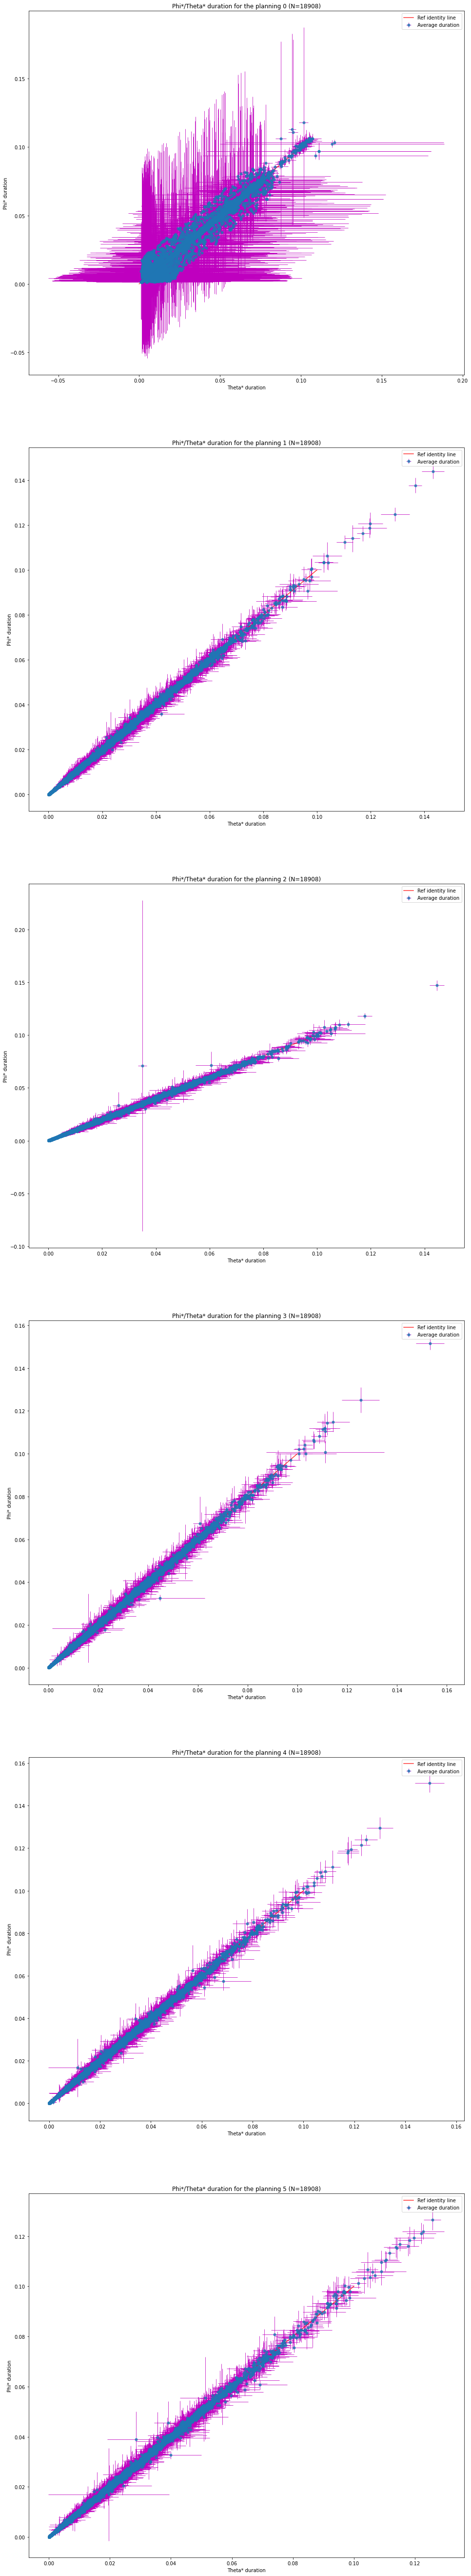

In [173]:
plt.figure(figsize=(16, 16*6))
plt.subplot(611)
durationVSPlot(0)
plt.subplot(612)
durationVSPlot(1)
plt.subplot(613)
durationVSPlot(2)
plt.subplot(614)
durationVSPlot(3)
plt.subplot(615)
durationVSPlot(4)
plt.subplot(616)
durationVSPlot(5)

Text(0.5, 1.0, 'Phi*/Theta* duration comparison between the initial planning and the first replanning (N=100)')

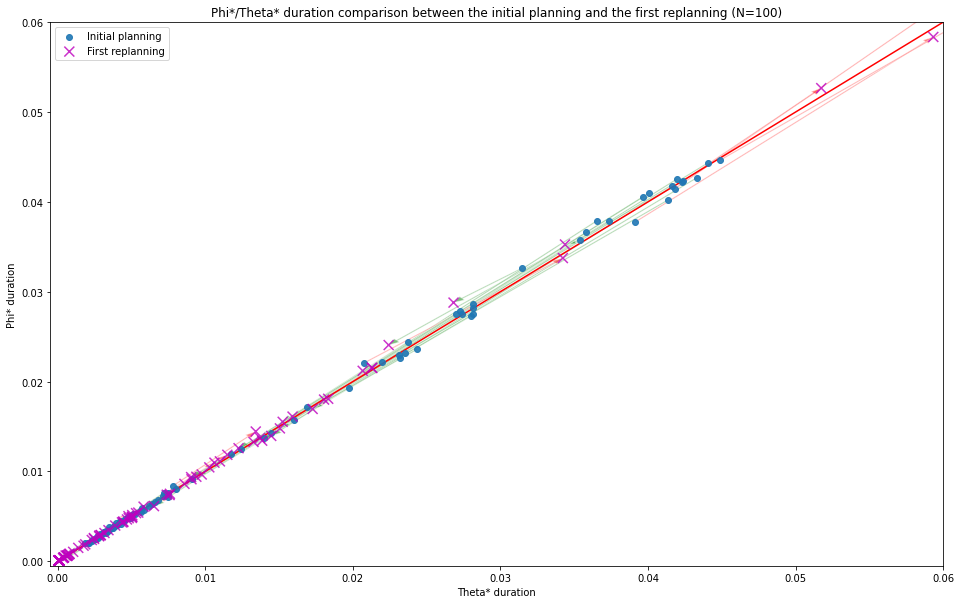

In [174]:
phiMean, phiStd, thetaMean, thetaStd = [], [], [], []
phiMean1, phiStd1, thetaMean1, thetaStd1 = [], [], [], []
plt.figure(figsize=(16,10))
for sample in data[100:200]:
    x, y, x1, y1 = sample['durationsThetaMean'][0], sample['durationsPhiMean'][0], sample['durationsThetaMean'][1], sample['durationsPhiMean'][1]
    phiMean.append(y)
    thetaMean.append(x)
    phiMean1.append(y1)
    thetaMean1.append(x1)
    
    plt.arrow(x, y, x1-x, y1-y, width=.0001, head_width=.0005, 
              length_includes_head=True, ec='w', fc='r' if x1>x else 'g', alpha=.5)
plt.scatter(thetaMean, phiMean, alpha=.9, zorder=10, label='Initial planning')
plt.scatter(thetaMean1, phiMean1, s=100, marker='x', alpha=.8, color='m', zorder=11, label='First replanning')
plt.plot([0,.1], [0,.1], color='r')
plt.xlabel('Theta* duration')
plt.ylabel('Phi* duration')
plt.ylim(-0.0005, 0.06)
plt.xlim(-0.0005, 0.06)
plt.legend()
plt.title('Phi*/Theta* duration comparison between the initial planning and the first replanning (N={})'.format(len(phiMean)))

Text(0.5, 1.0, 'Phi*/Theta* duration comparison between the initial planning and the first replanning (N=18908)')

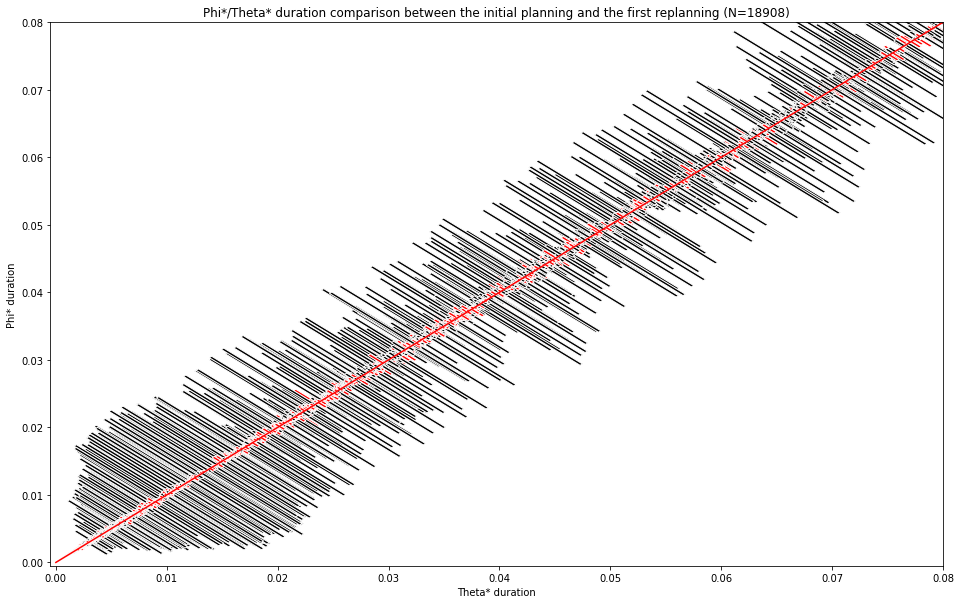

In [175]:
phiMean, phiStd, thetaMean, thetaStd = [], [], [], []
phiMean1, phiStd1, thetaMean1, thetaStd1 = [], [], [], []
plt.figure(figsize=(16,10))
for sample in data:
    x, y, x1, y1 = sample['durationsThetaMean'][0], sample['durationsPhiMean'][0], sample['durationsThetaMean'][1], sample['durationsPhiMean'][1]
    phiMean.append(y)
    thetaMean.append(x)
    
    p = (x+y)/2
    plt.arrow(p, p, x-p, y-p, width=.0003, head_width=0, 
              length_includes_head=True, ec='w', fc='k', alpha=1)
    p = (x1+y1)/2
    plt.arrow(p, p, x1-p, y1-p, width=.0003, head_width=0, 
              length_includes_head=True, ec='w', fc='r', alpha=1)
#plt.scatter(thetaMean, phiMean, alpha=.1, zorder=10, label='Initial planning')
plt.plot([0,.1], [0,.1], color='r')
plt.xlabel('Theta* duration')
plt.ylabel('Phi* duration')
plt.ylim(-0.0005, .08)
plt.xlim(-0.0005, .08)
plt.title('Phi*/Theta* duration comparison between the initial planning and the first replanning (N={})'.format(len(phiMean)))

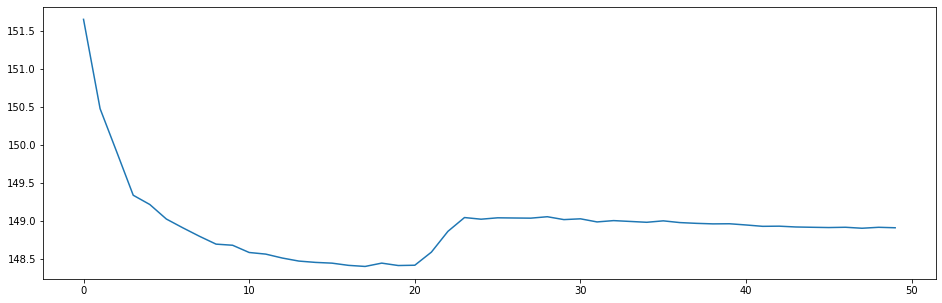

In [183]:
ts = np.array([151.6481843,  149.29956079, 148.77687573, 147.6202991,  148.72800136, 148.06820822, 148.2110045 , 148.02136278, 147.86881852, 148.54600859, 147.63230896, 148.3279202 , 147.89133978, 147.95150423, 148.21154523,148.29438353, 147.94872022, 148.15844512, 149.2301333,  147.81251431,148.4921701 , 152.20171332, 154.87908936, 153.21336913, 148.49849105,149.49515057, 148.97377062, 148.97957182, 149.57858419, 147.9178071,149.34095359, 147.71636319, 149.55632496, 148.63030338, 148.60411167,149.65987134, 148.15979815, 148.59201717, 148.69691753, 149.02170134,148.30258369, 148.19889116, 149.0171144 , 148.46325731, 148.73825836,148.7566185,  149.08437419, 148.29682493, 149.51490617, 148.60670018])
means = np.zeros(ts.shape[0])
for i, t in enumerate(ts):
    means[i] = ts[:i+1].mean()
plt.figure(figsize=(16,5))
plt.plot(means)